In [2]:
import numpy as np
import pandas as pd
import os
from glob import glob
from pprint import pprint
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.pyplot as plt

import cellcycle.PlottingTools as plottingTools
from cellcycle.ParameterSet import ParameterSet
import cellcycle.DataStorage as dataStorage
import cellcycle.DataAnalysis as dataAnalysis
import cellcycle.MakeDataframe as makeDataframe

In [3]:
file_path = '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S14_AIT_SeqA/variation_growth_rate'
parameter_path = os.path.join(file_path, 'parameter_set.csv')

In [4]:
pinkish_red = (247 / 255, 109 / 255, 109 / 255)
green = (0 / 255, 133 / 255, 86 / 255)
dark_blue = (36 / 255, 49 / 255, 94 / 255)
light_blue = (168 / 255, 209 / 255, 231 / 255)
blue = (55 / 255, 71 / 255, 133 / 255)
yellow = (247 / 255, 233 / 255, 160 / 255)

In [5]:
v_init_exp = 0.28
std_exp = 0.05

In [6]:
data_frame = makeDataframe.make_dataframe(file_path)
data_frame = makeDataframe.add_average_values_to_df(data_frame)
data_frame = makeDataframe.add_theoretical_init_reg_concentrations_to_df(data_frame)
data_frame.simu_name

['/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S14_AIT_SeqA/variation_growth_rate/titration_variance',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S14_AIT_SeqA/variation_growth_rate/titration_SeqA_variance',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S14_AIT_SeqA/variation_growth_rate/variances_models.pdf',
 '/home/berger/Documents/Arbeit/PhD/data/UltrasensitivityCombined/NatCom/SI/S14_AIT_SeqA/variation_growth_rate/Fig_3C_poster.pdf']


0          titration_variance
1          titration_variance
2          titration_variance
3          titration_variance
4          titration_variance
5          titration_variance
6          titration_variance
7          titration_variance
8          titration_variance
9          titration_variance
10         titration_variance
11         titration_variance
12         titration_variance
13         titration_variance
14         titration_variance
15         titration_variance
16         titration_variance
17         titration_variance
18         titration_variance
19         titration_variance
20    titration_SeqA_variance
21    titration_SeqA_variance
22    titration_SeqA_variance
23    titration_SeqA_variance
24    titration_SeqA_variance
25    titration_SeqA_variance
26    titration_SeqA_variance
27    titration_SeqA_variance
28    titration_SeqA_variance
29    titration_SeqA_variance
30    titration_SeqA_variance
31    titration_SeqA_variance
32    titration_SeqA_variance
33    titr

# Calculate initiation volume theoretically

In [7]:
def calculate_v_initi_no_overlap_switch_time_varying(df):
    try:
#         print(df.production_rate_dars1)
        production_rate_dars1 = df.production_rate_dars1
    except:
        production_rate_dars1 = 0
    return df.destruction_rate_datA / df.production_rate_lipids * df.frac_init * \
           (df.michaelis_const_prod + (1 - df.frac_init) * df.total_conc) / \
           ((1 - df.frac_init) * (df.michaelis_const_destr + df.frac_init * df.total_conc))-((production_rate_dars1+ df.production_rate_dars2)/df.production_rate_lipids)

def calculate_v_initi_overlap_switch_time_varying(df):
    try:
#         print(df.production_rate_dars1)
        production_rate_dars1 = df.production_rate_dars1
    except:
        production_rate_dars1 = 0
    return (df.destruction_rate_datA + df.high_rate_datA + df.destruction_rate_rida) / df.production_rate_lipids * df.frac_init * \
           (df.michaelis_const_prod + (1 - df.frac_init) * df.total_conc) / \
           ((1 - df.frac_init) * (df.michaelis_const_destr + df.frac_init * df.total_conc))- \
           ((production_rate_dars1 + df.production_rate_dars2 + df.high_rate_dars2)/df.production_rate_lipids)

data_frame["v_init_per_n_ori_th_no_time_varying"] = data_frame.apply(lambda row: calculate_v_initi_no_overlap_switch_time_varying(row), axis=1)
data_frame["v_init_per_n_ori_th_o_time_varying"] = data_frame.apply(lambda row: calculate_v_initi_no_overlap_switch_time_varying(row), axis=1)
data_frame.v_init_per_n_ori

0     0.265719
1     0.091399
2     0.239857
3     0.234881
4     0.091910
5     0.249976
6     0.090888
7     0.132824
8     0.225092
9     0.138053
10    0.131647
11    0.137045
12    0.133697
13    0.244884
14    0.092602
15    0.230010
16    0.134999
17    0.255216
18    0.260372
19    0.136107
20    0.295136
21    0.253819
22    0.296474
23    0.296469
24    0.251881
25    0.296344
26    0.255871
27    0.282499
28    0.295584
29    0.295293
30    0.259396
31    0.294890
32    0.297504
33    0.296560
34    0.250897
35    0.295912
36    0.296799
37    0.296133
38    0.295658
39    0.295843
Name: v_init_per_n_ori, dtype: float64

In [8]:
def calculate_v_init_switch_synthesis(df):
    if df.include_synthesis==0:
        return df.destruction_rate_datA / df.production_rate_lipids * df.frac_init * \
               (df.michaelis_const_prod + (1 - df.frac_init) * df.total_conc) / \
               ((1 - df.frac_init) * (df.michaelis_const_destr + df.frac_init * df.total_conc))
    else:
        return (df.destruction_rate_datA/df.total_conc) * \
                df.frac_init / (df.michaelis_const_destr/df.total_conc+ df.frac_init) * \
                (df.michaelis_const_prod / df.total_conc + 1 - df.frac_init) / \
                ((1- df.frac_init) * \
                (df.production_rate_lipids/df.total_conc + df.rate_growth * (df.michaelis_const_prod / df.total_conc + 1 - df.frac_init)))
    
data_frame["v_init_per_n_ori_synthesis"] = data_frame.apply(lambda row: calculate_v_init_switch_synthesis(row), axis=1)


# Calculate CV

In [9]:
for simu_name in data_frame.simu_name.unique():
    simu_df = data_frame[data_frame["simu_name"] == simu_name]
    print(simu_name)
    data_frame.loc[data_frame['simu_name'] == simu_name, 'mean_v_init_per_n_ori'] = np.mean(simu_df["v_init_per_n_ori"])
    data_frame.loc[data_frame['simu_name'] == simu_name, 'stdd_v_init_per_n_ori'] = np.std(simu_df["v_init_per_n_ori"])
    data_frame.loc[data_frame['simu_name'] == simu_name, 'cv_v_init_per_n_ori'] = np.std(simu_df["v_init_per_n_ori"])/np.mean(simu_df["v_init_per_n_ori"])

titration_variance
titration_SeqA_variance


# Calculate variance at different growth rates

In [10]:
def return_array_of_initiation_volumes(filepath_h5):
    data_frame = pd.read_hdf(filepath_h5, key='dataset_init_events')
    return data_frame['v_init_per_ori'], data_frame['t_init']

def calculate_CV_v_init(row):
    v_init_per_ori, t_init = return_array_of_initiation_volumes(row.path_dataset)
    v_init_np = v_init_per_ori.to_numpy()
    return np.std(v_init_np[5:])/np.mean(v_init_np[5:])

In [11]:
data_frame["CV_v_init"] = data_frame.apply(lambda row: calculate_CV_v_init(row), axis=1)
data_frame.CV_v_init

0     0.000418
1     0.345114
2     0.000538
3     0.000768
4     0.326573
5     0.000509
6     0.354771
7     0.225730
8     0.003985
9     0.257459
10    0.219810
11    0.251608
12    0.231787
13    0.000460
14    0.317209
15    0.000761
16    0.237521
17    0.000495
18    0.000423
19    0.243392
20    0.000160
21    0.002780
22    0.000373
23    0.000384
24    0.001220
25    0.000463
26    0.007154
27    0.072171
28    0.000562
29    0.000513
30    0.018489
31    0.028016
32    0.096996
33    0.000418
34    0.000746
35    0.000402
36    0.085081
37    0.000289
38    0.000205
39    0.064267
Name: CV_v_init, dtype: float64

# Make Legends

In [12]:
def make_production_rate_datA_lipids_cv_legend(destruction_rate_datA, production_rate_lipids, cv):
    return r'$\beta_{{\rm datA}}={}$ /h, $\alpha_{{\rm lipids}}={}$ /h, CV= {}'.format(np.round(destruction_rate_datA,3), 
                                                                                       np.round(production_rate_lipids,3), 
                                                                                       np.round(cv,3))

def make_production_rate_datA_cv_legend(destruction_rate_datA, cv):
    return r'$\beta_{{\rm datA}}={}$ /h, CV= {}'.format(np.round(destruction_rate_datA,3),
                                                        np.round(cv,3))

def make_production_rate_datA_legend(destruction_rate_datA):
    return r'$\beta_{{\rm datA}}={}$ min$^{{-1}}$'.format(int(destruction_rate_datA/60))

def make_production_rate_datA_lipids_legend(destruction_rate_datA, production_rate_lipids):
    return r'$\beta_{{\rm datA}}={}$ /h, \linebreak  $\alpha_{{\rm lipids}}={}$ /h'.format(np.round(destruction_rate_datA,3), 
                                                                                       np.round(production_rate_lipids,3))

def make_theoretical_v_init_legend(v_init_per_n_ori_th_no_time_varying):
    return r'$v^\ast_{{\rm th}}={} \, \mu $m$^3$'.format(np.round(v_init_per_n_ori_th_no_time_varying,3))

def make_legend_model(version_of_model, n_sites, block_production):
    if version_of_model == 'titration':
        if block_production == 0:
            return 'titration'
        else:
            return 'titration+SeqA'
    if n_sites==0:
        return 'LDDR model'
    else:
        if block_production == 0:
            return 'LDDR+titration'
        else:
            return 'LDDR+titration+SeqA'

def make_order(legend_models):
    if legend_models == 'titration':
        return 1
    if legend_models == 'titration+SeqA':
        return 2
    if legend_models == 'LDDR model':
        return 3
    if legend_models == 'LDDR+titration+SeqA':
        return 4
    


data_frame.loc[:, 'legend_datA_lipids_cv'] = data_frame.apply(lambda row: make_production_rate_datA_lipids_cv_legend(row.destruction_rate_datA,
                                                                                                              row.production_rate_lipids,
                                                                                                              row.cv_v_init_per_n_ori), axis = 1)

data_frame.loc[:, 'legend_datA_cv'] = data_frame.apply(lambda row: make_production_rate_datA_cv_legend(row.destruction_rate_datA,
                                                                                                              row.cv_v_init_per_n_ori), axis = 1)

data_frame.loc[:, 'legend_datA'] = data_frame.apply(lambda row: make_production_rate_datA_legend(row.destruction_rate_datA), axis = 1)

data_frame.loc[:, 'legend_datA_lipids'] = data_frame.apply(lambda row: make_production_rate_datA_lipids_legend(row.destruction_rate_datA,
                                                                                                              row.production_rate_lipids), axis = 1)

data_frame.loc[:, 'legend_v_init_th'] = data_frame.apply(lambda row: make_theoretical_v_init_legend(row.v_init_per_n_ori_th_no_time_varying), axis = 1)

data_frame.loc[:, 'legend_models'] = data_frame.apply(lambda row: make_legend_model(row.version_of_model, row.n_c_max_0, row.block_production), axis = 1)

data_frame.loc[:, 'legend_order'] = data_frame.apply(lambda row: make_order(row.legend_models), axis = 1)


# Determine minimal activator fraction

In [13]:
def determine_min_frac(filepath_h5, total_conc):
    data_frame_traces = pd.read_hdf(filepath_h5, key='dataset_time_traces')
    fractions = data_frame_traces['active_conc'] / total_conc
    return np.min(fractions[int(fractions.size/2):])

def determine_max_frac(filepath_h5, total_conc):
    data_frame_traces = pd.read_hdf(filepath_h5, key='dataset_time_traces')
    fractions = data_frame_traces['active_conc'] / total_conc
    return np.max(fractions[int(fractions.size/2):])

data_frame.loc[:, 'min_frac'] = data_frame.apply(lambda row: determine_min_frac(row.path_dataset, row.total_conc), axis = 1)
data_frame.loc[:, 'max_frac'] = data_frame.apply(lambda row: determine_max_frac(row.path_dataset, row.total_conc), axis = 1)
data_frame['amplitude_frac'] = data_frame['max_frac']-data_frame['min_frac']
data_frame['relative_change_frac']= data_frame['min_frac']/data_frame['max_frac']

# Plot initiation volume per origin

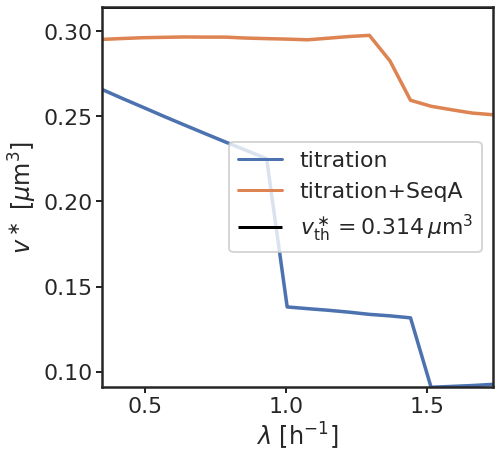

In [14]:
sns.set(style="ticks")
sns.set_context("poster")

fig, ax = plt.subplots(figsize=(7,7))
sns.lineplot(
    x='rate_growth', 
    y='v_init_per_n_ori',
    data=data_frame.sort_values(by=["destruction_rate_datA"], ascending=False),
    hue='legend_models',
#     palette= [green, blue, pinkish_red], # yellow],
    linewidth = 3.5,
    ax=ax
);
# ax.lines[0].set_linestyle("--")
# ax.lines[1].set_linestyle("--")
# ax.lines[2].set_linestyle("--")
# ax.lines[3].set_linestyle("--")
ax.margins(0)

# Theoretical prediction
ax.hlines(data_frame['v_init_per_n_ori_th_no_time_varying'][0], 
            data_frame['rate_growth'].min(), 
            data_frame['rate_growth'].max(), 
            color='black', 
            linestyle='-',
            label= data_frame['legend_v_init_th'].iloc[0])
# Experimental results
# ax.hlines(v_init_exp, 
#             data_frame['rate_growth'].min(), 
#             data_frame['rate_growth'].max(), 
#             color='black', 
#             label= r'$v^\ast_{{\rm exp}}={} \, \mu m^3$'.format(v_init_exp))
# upper_bound = np.array(data_frame['v_init_per_n_ori_th_no_time_varying']) + std_exp
# lower_bound = np.array(data_frame['v_init_per_n_ori_th_no_time_varying']) - std_exp
# ax.axhspan(upper_bound[0], lower_bound[0], facecolor='black', alpha=0.1)

ax.set(xlabel=r'$\lambda$ [h$^{-1}$]', ylabel=r'$v^\ast$ [$\mu$m$^3$]')
# ax.set(ylim=(0,0.45))
ax.tick_params(direction='out', length=6, width=2, grid_alpha=0.5)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
plt.savefig(file_path + '/Fig_3C_poster.pdf', format='pdf', bbox_inches='tight')

# Plot amplitude time varying

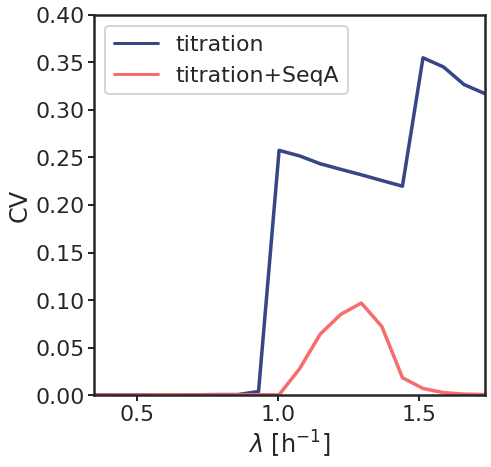

In [15]:
sns.set(style="ticks")
sns.set_context("poster")

fig, ax = plt.subplots(figsize=(7,7))
sns.lineplot(
    x='rate_growth', 
    y='CV_v_init',
    data=data_frame.sort_values(by=["legend_order"]),
    hue='legend_models',
    dashes=[(4, 1), (4, 1), (4, 1), (4, 1)],
    markers=True,
    palette= [blue, pinkish_red], #,  pinkish_red, light_blue],
    linewidth = 3.5,
    ax=ax
);
# ax.lines[0].set_linestyle("--")
# ax.lines[1].set_linestyle("--")
# ax.lines[2].set_linestyle("--")
# ax.lines[3].set_linestyle("--")
ax.margins(0)
ax.set(xlabel=r'$\lambda$ [h$^{-1}$]', ylabel=r'CV')
# plt.legend(labels=legend
ax.set(ylim=(0,0.4))
ax.tick_params(direction='out', length=6, width=2, grid_alpha=0.5)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
plt.savefig(file_path + '/variances_models.pdf', format='pdf', bbox_inches='tight')